** Seattle

Importation des librairies

In [23]:
import numpy as np
import pandas as pd
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Chargement et exploration des données

In [24]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [25]:
data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [26]:
data.loc[data['NumberofFloors'] == 99, 'NumberofFloors'] = 1

<Axes: >

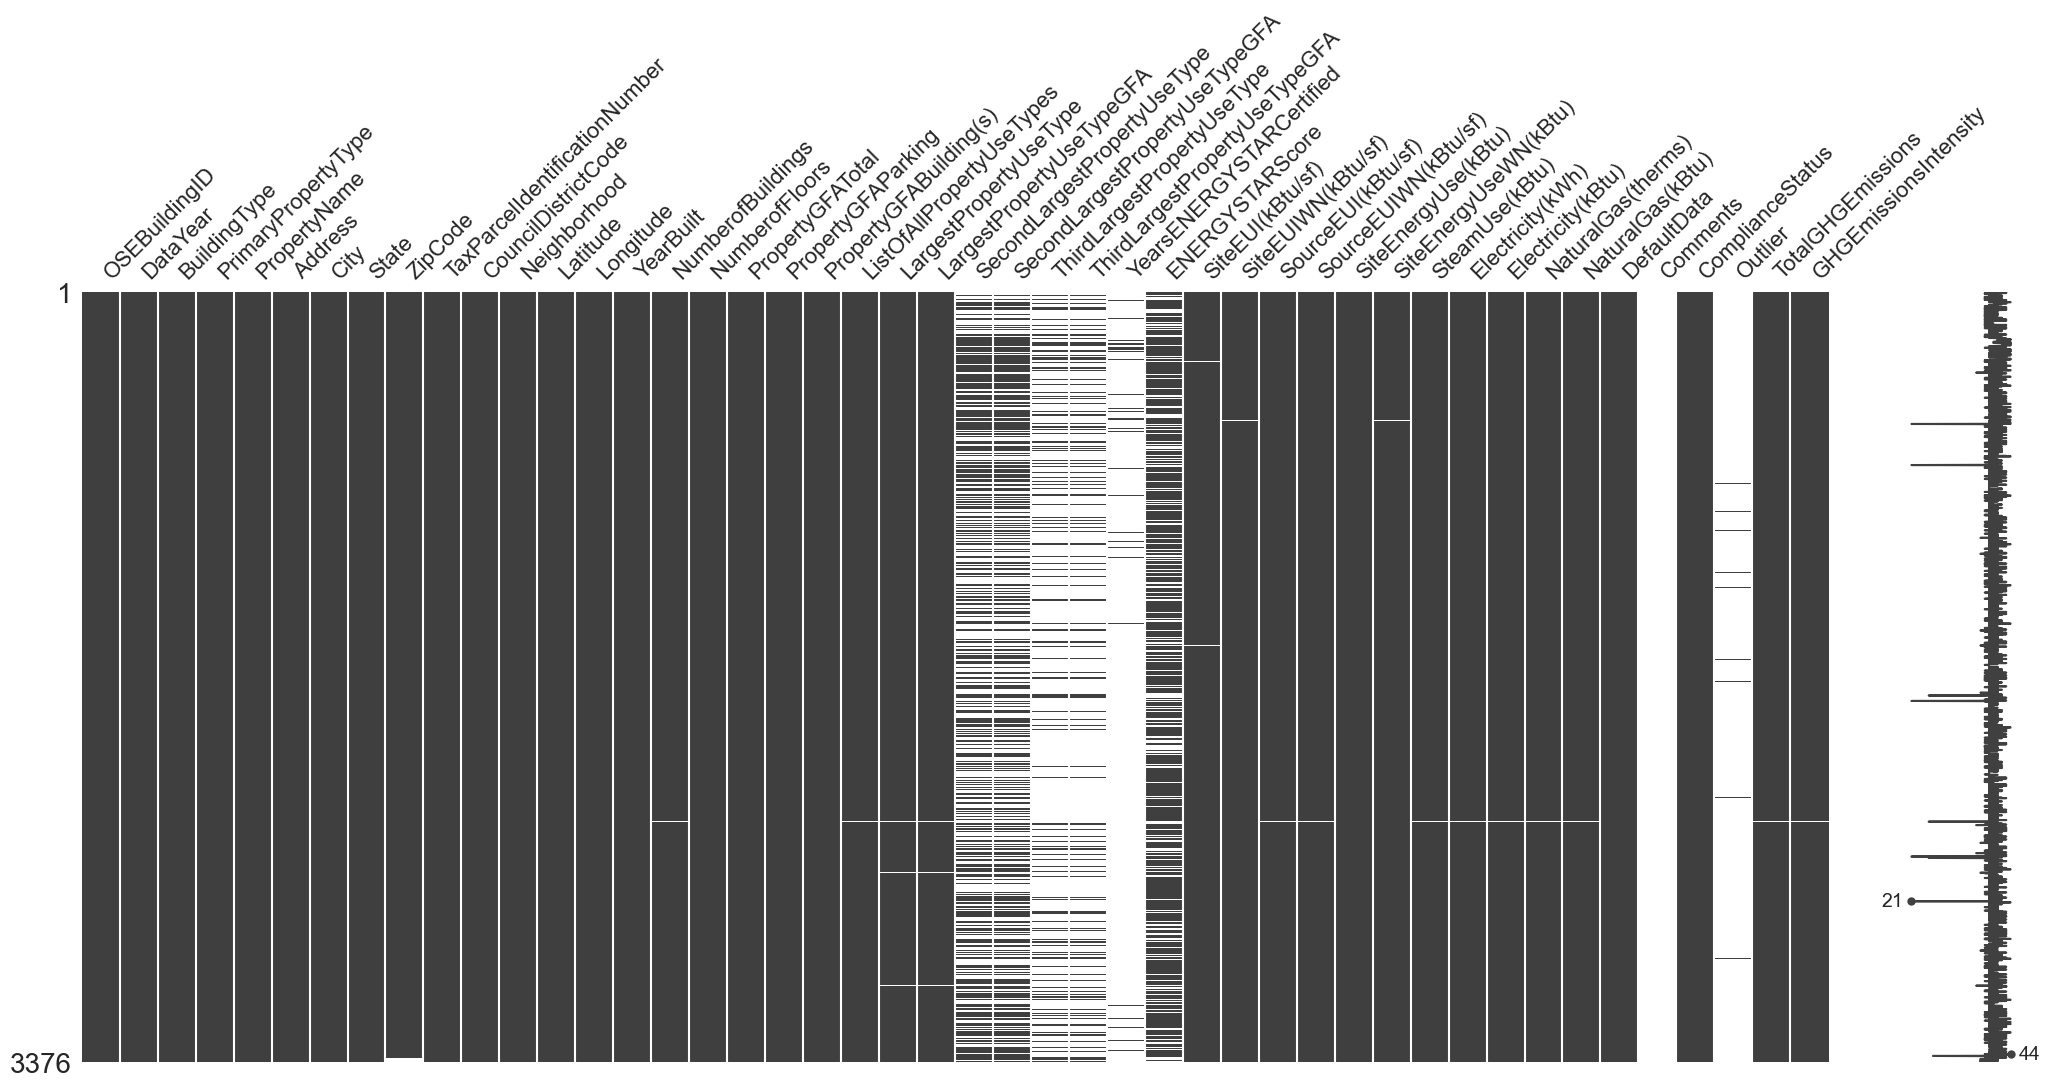

In [27]:
msno.matrix(data)

<Axes: >

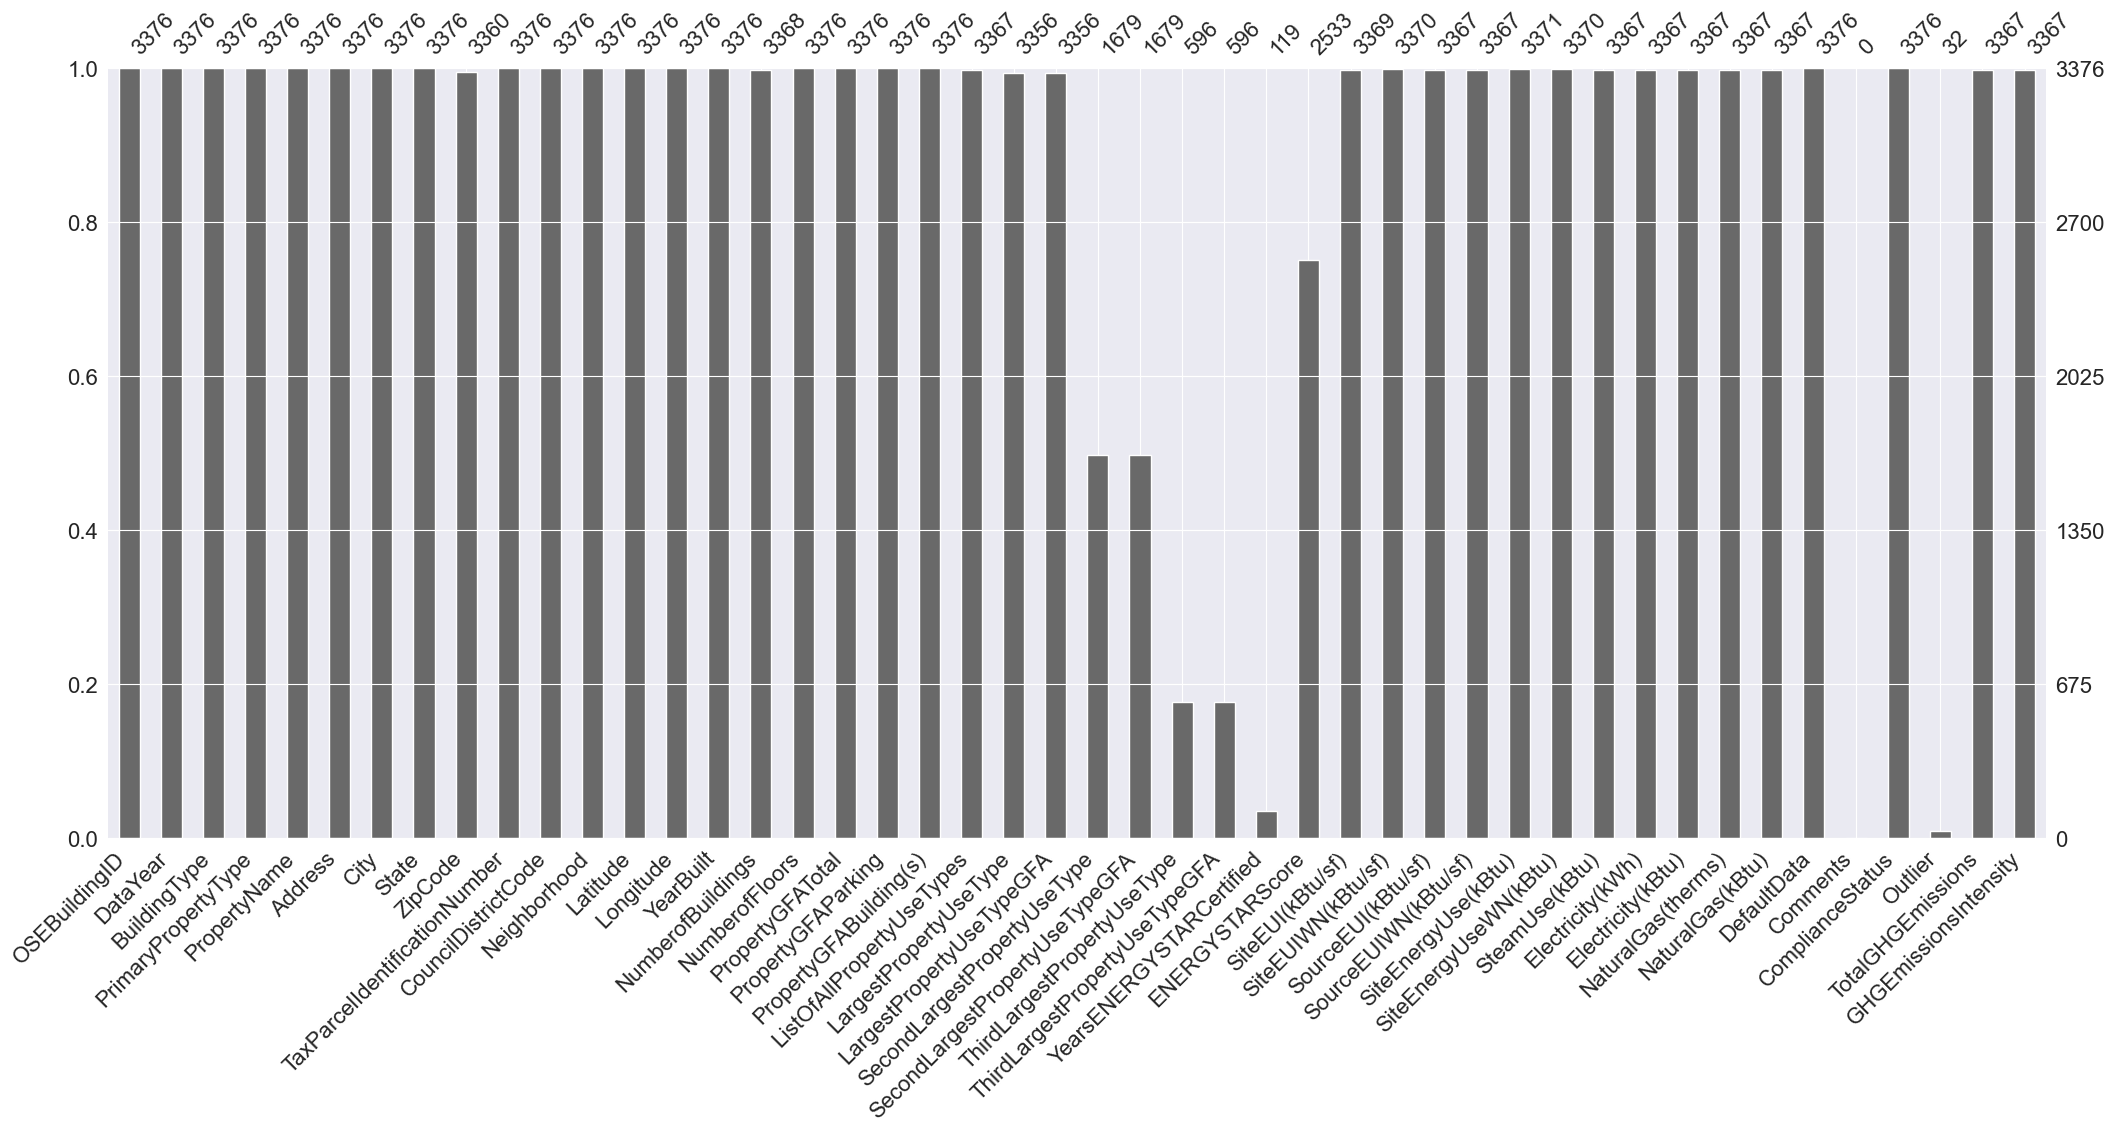

In [28]:
msno.bar(data)

In [29]:
outlier_column = data[~data['Outlier'].isnull()]
outlier_column

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0,0942000045,...,1.166315e+07,39794668.0,16048.309570,1604831.0,False,NaN,Non-Compliant,High outlier,362.66,2.10
384,539,2016,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.0,5335200380,...,9.348260e+04,318963.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,2.22,0.03
448,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.0,5247800200,...,4.715030e+05,1608768.0,3430.500488,343050.0,False,NaN,Non-Compliant,Low outlier,29.43,0.19
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.0,7666202110,...,7.953454e+06,27137187.0,0.000000,0.0,False,NaN,Non-Compliant,High outlier,189.18,1.46
720,19708,2016,Multifamily HR (10+),High-Rise Multifamily,Bay Vista,2821 2nd Ave,Seattle,WA,98121.0,0586400000,...,6.265616e+05,2137828.0,2700.760010,270076.0,False,NaN,Non-Compliant,Low outlier,29.25,0.17
834,19934,2016,Multifamily LR (1-4),Low-Rise Multifamily,Belmont Lofts,231 Belmont Ave E,Seattle,WA,98102.0,0704600000,...,7.502090e+04,255971.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,1.78,0.06
839,19967,2016,SPS-District K-12,K-12 School,Queen Anne Gym,1431 2nd Ave N,Seattle,WA,98109.0,0811000005,...,7.228240e+04,246628.0,1848.439575,184844.0,True,NaN,Error - Correct Default Data,Low outlier,11.54,0.32
962,20367,2016,Multifamily LR (1-4),Low-Rise Multifamily,City Lights on Harbor,2349 Harbor Ave. SW,Seattle,WA,98126.0,1595200000,...,2.058855e+05,702481.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,4.90,0.07
1045,20617,2016,NonResidential,Retail Store,Seattle Habitat Store,21 S Nevada St,Seattle,WA,98134.0,1824049074,...,1.436250e+04,49005.0,964.640015,96464.0,True,NaN,Error - Correct Default Data,Low outlier,5.46,0.14
1229,21315,2016,NonResidential,Small- and Mid-Sized Office,1518 Fifith Ave,1520 Fifth Ave,Seattle,WA,98101.0,1975700135,...,7.064900e+03,24105.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,0.17,0.00


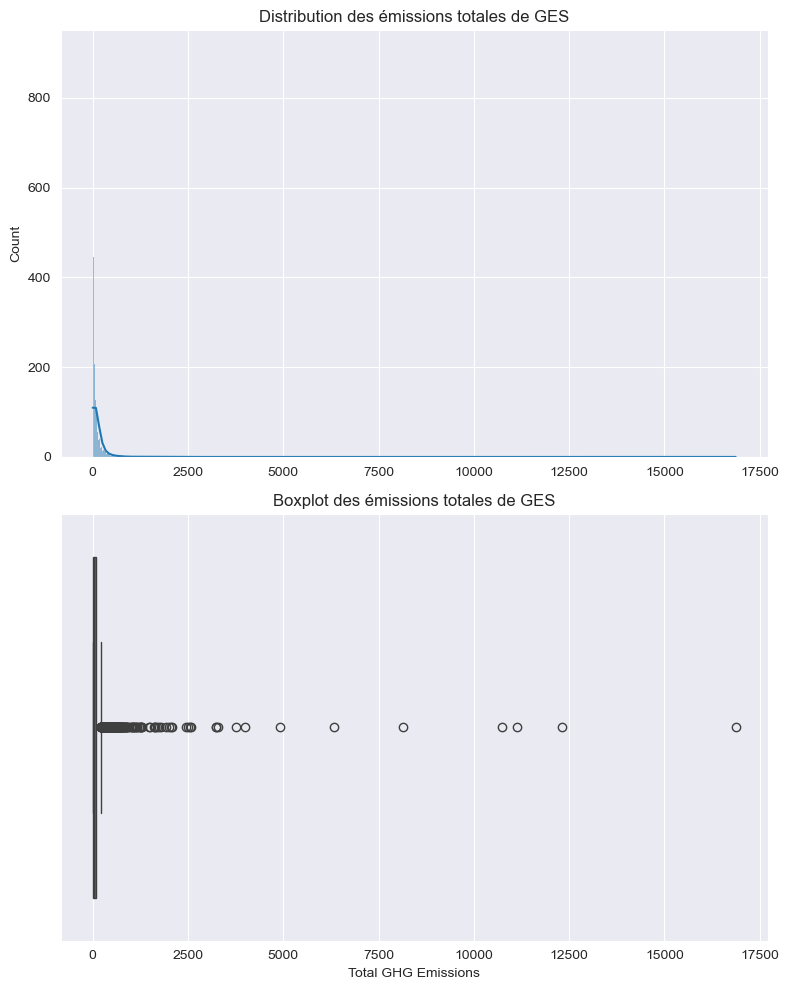

In [30]:
targets = ['SiteEnergyUse(kBtu)','TotalGHGEmissions']

fig, ax = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(data['TotalGHGEmissions'], kde=True, ax=ax[0])
ax[0].set_title('Distribution des émissions totales de GES')
ax[0].set_xlabel('')

sns.boxplot(x=data['TotalGHGEmissions'], ax=ax[1])
ax[1].set_title('Boxplot des émissions totales de GES')
ax[1].set_xlabel('Total GHG Emissions')

plt.tight_layout()

plt.show()

In [31]:
emission_outliers = data[data['TotalGHGEmissions']>2000]
emission_outliers

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,14515435.0,49526664.0,1.493800e+04,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
35,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,...,44102076.0,150476283.0,2.979090e+06,297909000.0,False,NaN,Compliant,NaN,16870.98,34.09
49,63,2016,NonResidential,Hotel,Sheraton Seattle Hotel,1400 6th Avenue,Seattle,WA,98101.0,1976700095,...,13348631.0,45545529.0,2.332499e+05,23324992.0,False,NaN,Compliant,NaN,2451.58,2.47
119,338,2016,NonResidential,Other,Jack R. McDonald Building,1900 9th Ave.,Seattle,WA,98101.0,0660001215,...,8983483.0,30651644.0,3.468533e+05,34685331.0,False,NaN,Compliant,NaN,2055.82,6.87
124,198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,4800 Sand Point Way NE,Seattle,WA,98105.0,2982800005,...,33892500.0,115641210.0,1.381912e+06,138191238.0,False,NaN,Compliant,NaN,8145.52,9.27
167,268,2016,NonResidential,Hospital,Swedish Cherry Hill,500 17th Ave,Seattle,WA,98122.0,7942600331,...,17220084.0,58754927.0,8.466809e+05,84668094.0,False,NaN,Compliant,NaN,4906.33,8.21
170,276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104.0,8590900220,...,49438336.0,168683602.0,1.832129e+04,1832129.0,False,NaN,Compliant,NaN,10734.57,9.26
262,389,2016,NonResidential,Hotel,Fairmont Olympic Seattle,411 University Street,Seattle,WA,98101.0,0002400003,...,7056889.5,24078107.0,3.968211e+04,3968211.0,False,NaN,Compliant,NaN,2573.75,4.75
340,477,2016,Campus,Other,Weintraub/Hutchinson/Thomas,1100 Fairview Ave N,Seattle,WA,98109.0,1984200455,...,18941222.0,64627449.0,6.674642e+05,66746425.0,False,NaN,Compliant,NaN,3995.45,7.45
618,828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,Seattle,WA,98122.0,1978201096,...,40842564.0,139354828.0,1.731612e+05,17316120.0,False,NaN,Compliant,NaN,12307.16,6.97


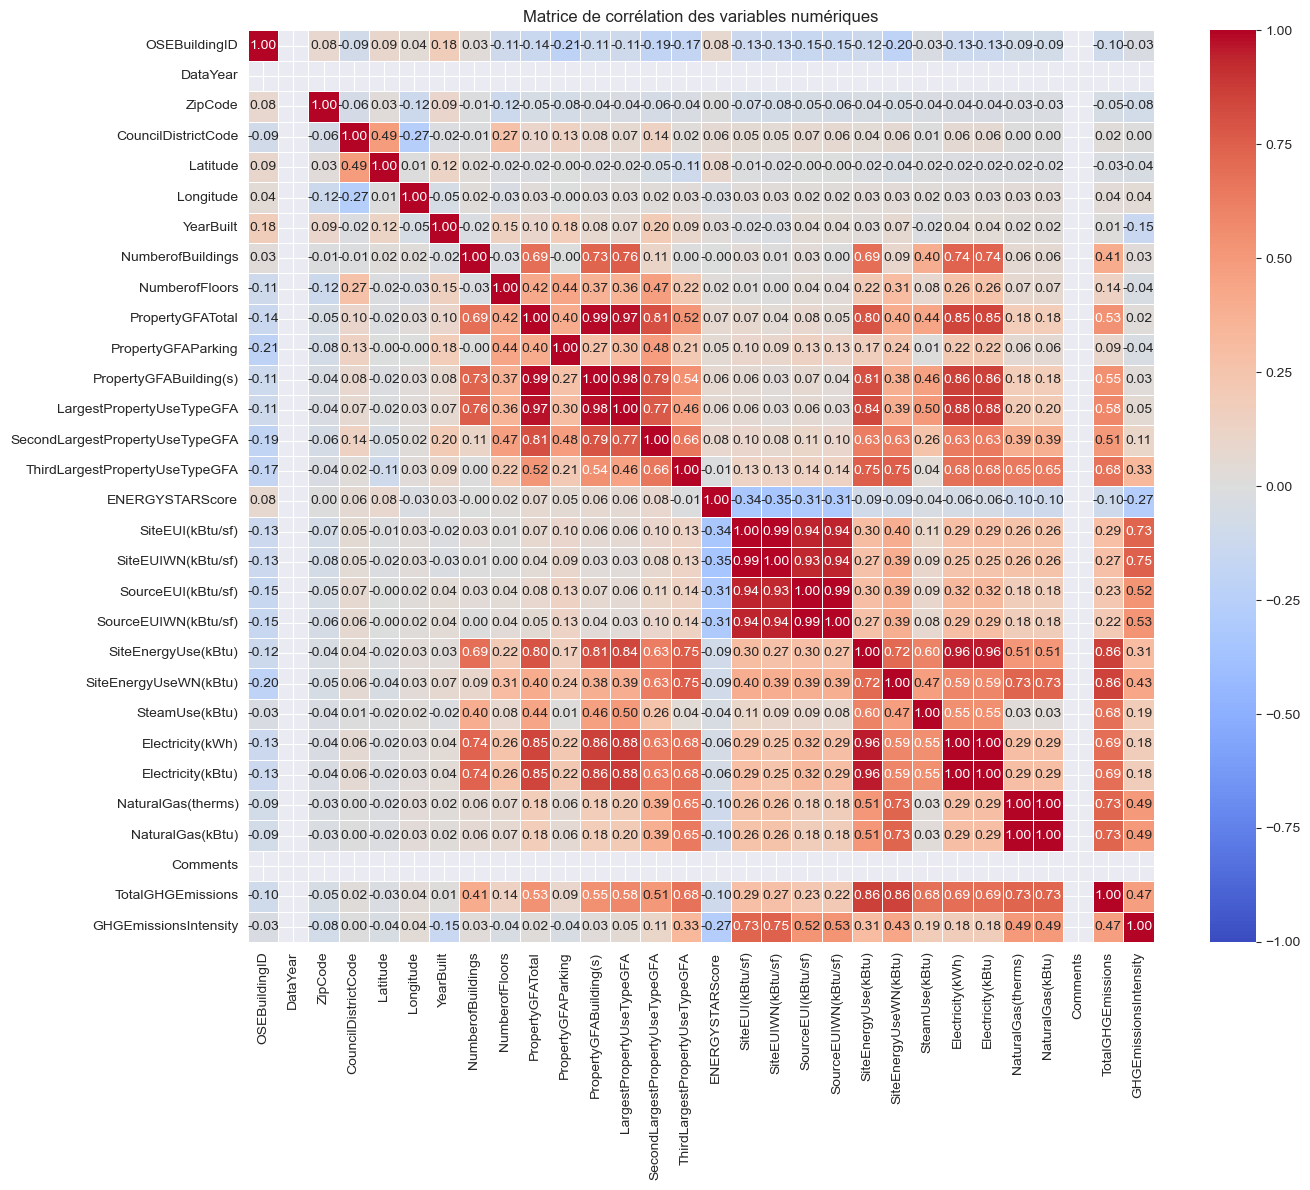

In [32]:
data_numeric = data.select_dtypes(include=['float64','int64'])

corr_matrix = data_numeric.corr()

plt.figure(figsize=(14,12))

sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5,square=False,vmin=-1,vmax=1)

plt.title("Matrice de corrélation des variables numériques")
plt.tight_layout()
plt.show()

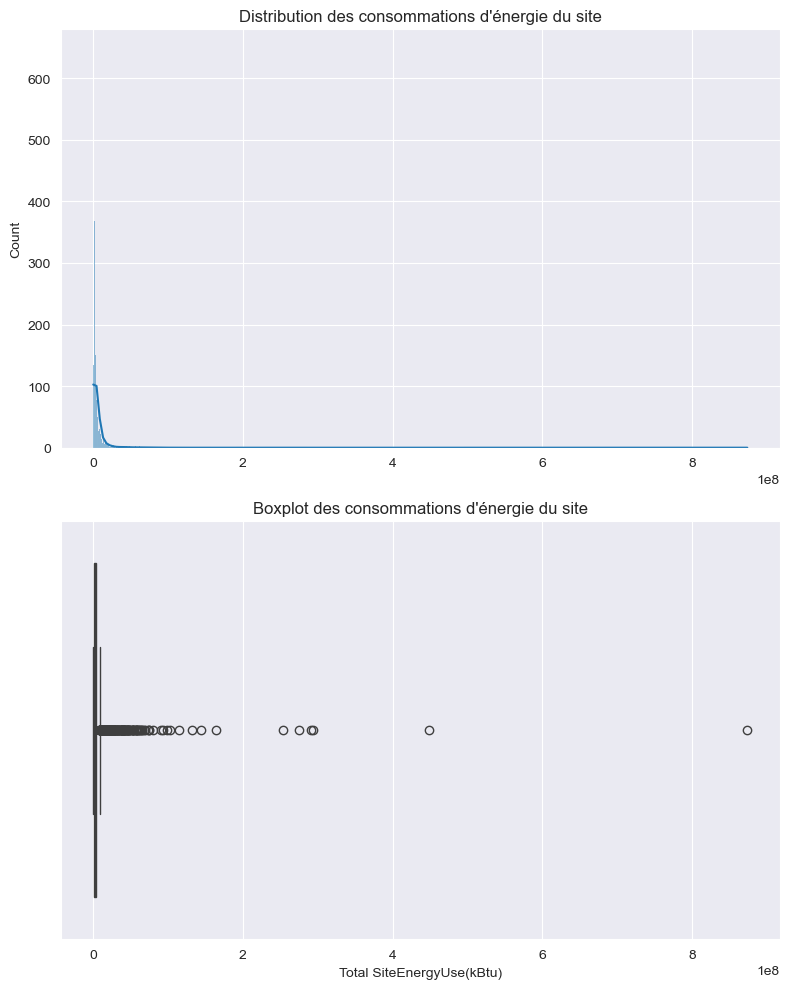

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(data['SiteEnergyUse(kBtu)'], kde=True, ax=ax[0])
ax[0].set_title('Distribution des consommations d\'énergie du site')
ax[0].set_xlabel('')

sns.boxplot(x=data['SiteEnergyUse(kBtu)'], ax=ax[1])
ax[1].set_title('Boxplot des consommations d\'énergie du site')
ax[1].set_xlabel('Total SiteEnergyUse(kBtu)')

plt.tight_layout()

plt.show()

In [34]:
emission_outliers = data[data['SiteEnergyUse(kBtu)']>2e+08]
emission_outliers

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
35,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,...,44102076.0,150476283.0,2.979090e+06,297909000.0,False,NaN,Compliant,NaN,16870.98,34.09
124,198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,4800 Sand Point Way NE,Seattle,WA,98105.0,2982800005,...,33892500.0,115641210.0,1.381912e+06,138191238.0,False,NaN,Compliant,NaN,8145.52,9.27
170,276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104.0,8590900220,...,49438336.0,168683602.0,1.832129e+04,1832129.0,False,NaN,Compliant,NaN,10734.57,9.26
558,753,2016,NonResidential,Other,WestinBuilding,2001 6th Ave,Seattle,WA,98121.0,0659000950,...,80460872.0,274532495.0,1.496720e+03,149672.0,False,NaN,Compliant,NaN,1921.82,4.48
618,828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,Seattle,WA,98122.0,1978201096,...,40842564.0,139354828.0,1.731612e+05,17316120.0,False,NaN,Compliant,NaN,12307.16,6.97
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,...,192577488.0,657074389.0,0.000000e+00,0.0,False,NaN,Compliant,NaN,11140.56,1.20


In [35]:
data = data.loc[data['BuildingType'] == 'NonResidential']
data.drop(data.columns[data.isnull().mean()>0.2], axis=1, inplace=True)
data = data.dropna(axis=0, how='any')

<Axes: >

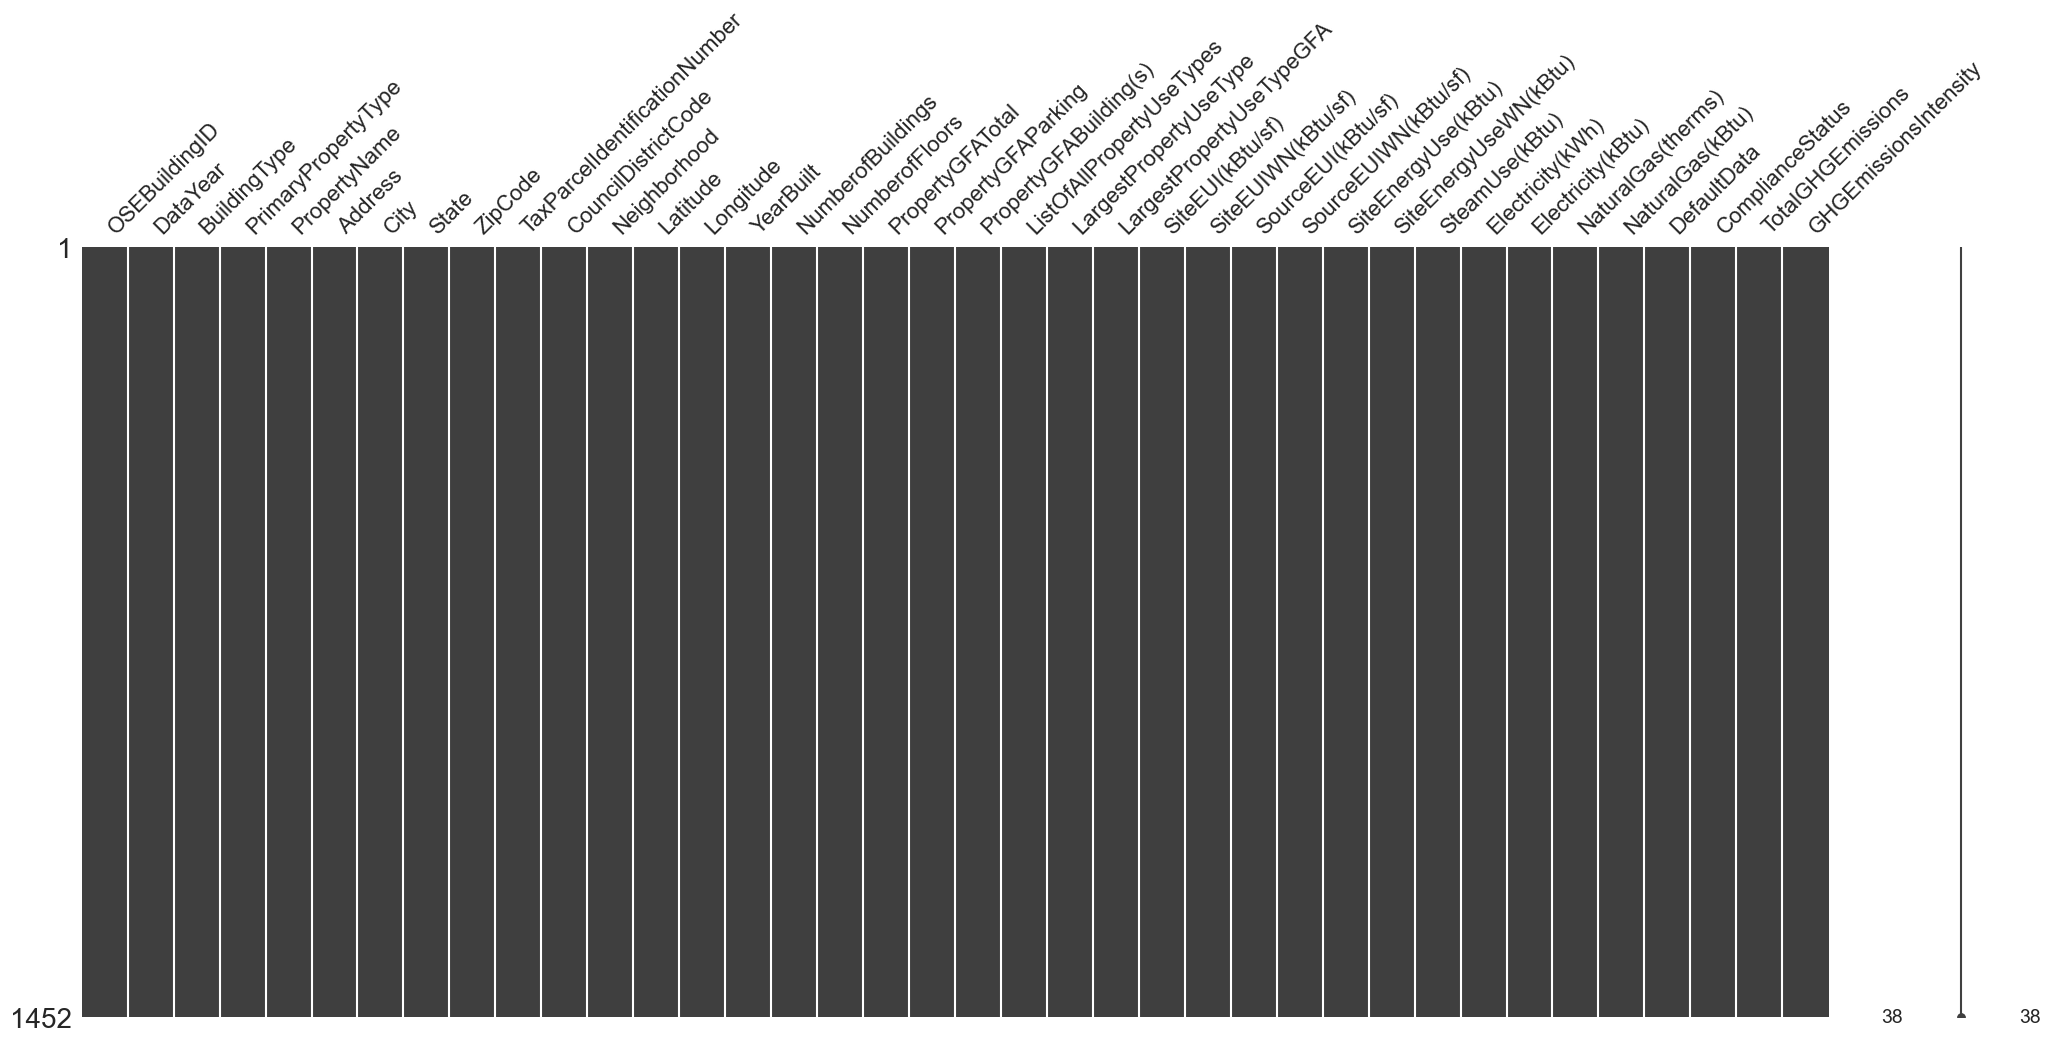

In [36]:
msno.matrix(data)

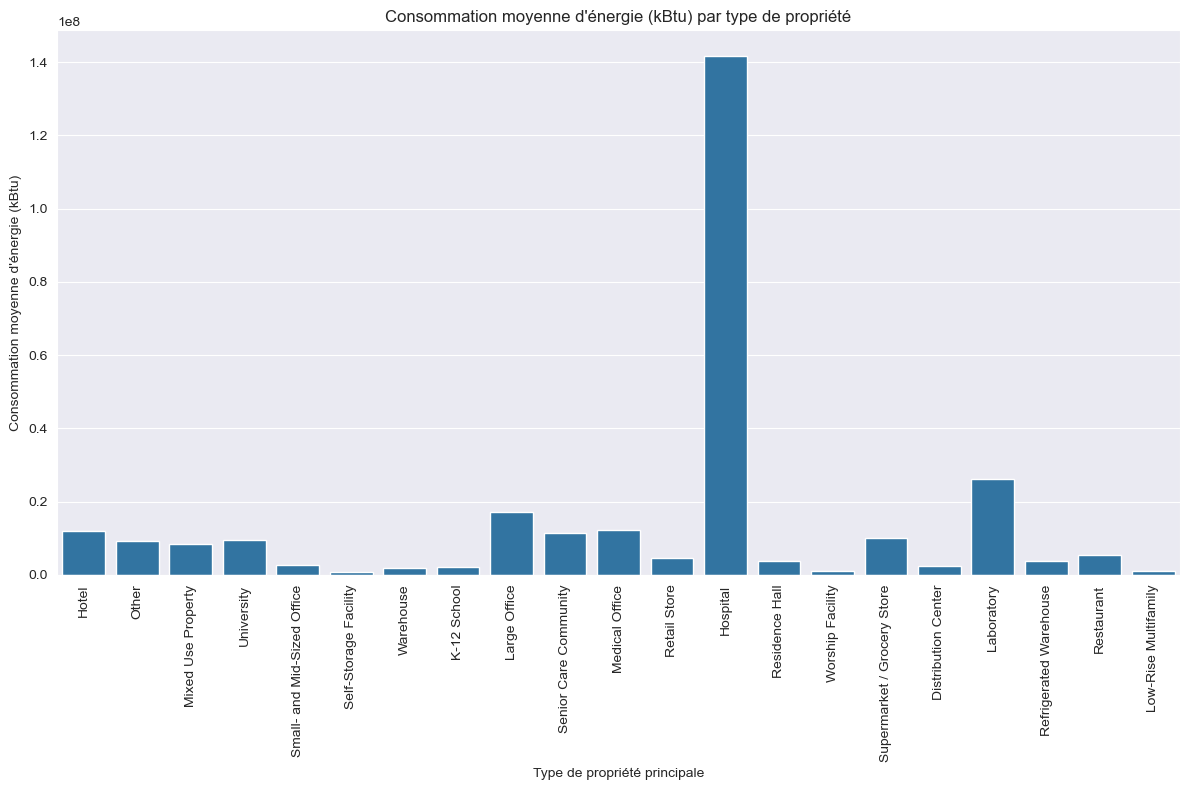

In [37]:
plt.figure(figsize=(12, 8))

sns.barplot(x='PrimaryPropertyType', y='SiteEnergyUse(kBtu)', data=data, estimator=np.mean,errorbar=None)

plt.xticks(rotation=90)

plt.title('Consommation moyenne d\'énergie (kBtu) par type de propriété')

plt.xlabel('Type de propriété principale')
plt.ylabel('Consommation moyenne d\'énergie (kBtu)')

plt.tight_layout()
plt.show()

In [38]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[47.6062, -122.3321], zoom_start=11)

colormap = plt.get_cmap('YlOrRd')

norm = plt.Normalize(vmin=data['SiteEnergyUse(kBtu)'].min(), vmax=data['SiteEnergyUse(kBtu)'].max())

for index, row in data.iterrows():
    energy_use = row['SiteEnergyUse(kBtu)']
    color = colormap(norm(energy_use)) 
    color_hex = '#{:02x}{:02x}{:02x}'.format(int(color[0]*255), int(color[1]*255), int(color[2]*255))
    
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],  
        radius=5,  
        color=color_hex,
        fill=True,
        fill_color=color_hex,
        fill_opacity=0.7,
        popup=f"{row['Neighborhood']}<br>Energy Use: {energy_use} kBtu"
    ).add_to(m)

m.save("carte_neighborhoods.html")
m

In [39]:
today = datetime.now().year
data['age'] = today - data['YearBuilt']
data['useElectricity'] = (data['Electricity(kWh)'] > 0).astype(int)
data['useSteam'] = (data['SteamUse(kBtu)'] > 0).astype(int)
data['useGas'] = (data['NaturalGas(therms)'] > 0).astype(int)
features_to_drop = ['OSEBuildingID','DataYear','PropertyName','Address','City','State','ZipCode','TaxParcelIdentificationNumber','Latitude','Longitude','YearBuilt','ListOfAllPropertyUseTypes','SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)',
                    'SiteEnergyUseWN(kBtu)','SteamUse(kBtu)','Electricity(kWh)','Electricity(kBtu)','NaturalGas(therms)','NaturalGas(kBtu)','ComplianceStatus','DefaultData','GHGEmissionsIntensity']
data = data.drop(features_to_drop, axis=1)


In [40]:
def group_categories(row):
    if row['PrimaryPropertyType'] in ['Small- and Mid-Sized Office', 'Large Office', 'Medical Office']:
        return 'Offices'
    elif row['PrimaryPropertyType'] in ['K-12 School', 'University']:
        return 'Education'
    elif row['PrimaryPropertyType'] in ['Retail Store', 'Supermarket / Grocery Store', 'Warehouse', 'Distribution Center', 'Refrigerated Warehouse']:
        return 'Commerce and Distribution'
    elif row['PrimaryPropertyType'] in ['Hotel', 'Senior Care Community', 'Low-Rise Multifamily','Residence Hall']:
        return 'Accommodation'
    elif row['PrimaryPropertyType'] in ['Hospital', 'Laboratory']:
        return 'Specialized Facilities'
    elif row['PrimaryPropertyType'] in ['Worship Facility', 'Mixed Use Property']:
        return 'Community and Religious Centers'
    elif row['PrimaryPropertyType'] == 'Restaurant':
        return 'Restaurants'
    elif row['PrimaryPropertyType'] == 'Self-Storage Facility':
        return 'Self-Storage Facility'
    else:
        return 'Other'

data['PrimaryPropertyType'] = data.apply(group_categories, axis=1)

In [41]:
def group_categories(row):
    if row['LargestPropertyUseType'] in ['Office', 'Medical Office', 'Financial Office', 'Bank Branch']:
        return 'Offices'
    elif row['LargestPropertyUseType'] in ['Non-Refrigerated Warehouse', 'Distribution Center', 'Refrigerated Warehouse']:
        return 'Warehouses'
    elif row['LargestPropertyUseType'] in ['Retail Store', 'Supermarket/Grocery Store', 'Strip Mall', 'Wholesale Club/Supercenter']:
        return 'Retail'
    elif row['LargestPropertyUseType'] in ['Hotel', 'Senior Care Community', 'Other - Lodging/Residential']:
        return 'Lodging'
    elif row['LargestPropertyUseType'] in ['Residence Hall/Dormitory', 'Multifamily Housing']:
        return 'Residential & Dormitories'
    elif row['LargestPropertyUseType'] in ['K-12 School', 'College/University', 'Pre-school/Daycare', 'Adult Education', 'Other - Education']:
        return 'Education'
    elif row['LargestPropertyUseType'] in ['Worship Facility', 'Social/Meeting Hall', 'Performing Arts', 'Other - Entertainment/Public Assembly',
                          'Museum', 'Other - Recreation', 'Courthouse']:
        return 'Community and Entertainment'
    elif row['LargestPropertyUseType'] in ['Restaurant', 'Other - Restaurant/Bar', 'Food Service']:
        return 'Restaurants'
    elif row['LargestPropertyUseType'] in ['Manufacturing/Industrial Plant', 'Repair Services (Vehicle, Shoe, Locksmith, etc)']:
        return 'Industrial'
    elif row['LargestPropertyUseType'] in ['Hospital (General Medical & Surgical)', 'Urgent Care/Clinic/Other Outpatient', 'Other/Specialty Hospital']:
        return 'Health Services'
    elif row['LargestPropertyUseType'] in ['Fitness Center/Health Club/Gym', 'Personal Services (Health/Beauty, Dry Cleaning, etc)', 'Other - Services']:
        return 'Services'
    elif row['LargestPropertyUseType'] == 'Self-Storage Facility':
        return 'Self-Storage Facility'
    else:
        return 'Other'

data['LargestPropertyUseType'] = data.apply(group_categories, axis=1)

In [42]:
# Grouper par PrimaryPropertyType et LargestPropertyUseType et compter les occurrences
association_counts = data.groupby(['PrimaryPropertyType', 'LargestPropertyUseType']).size().reset_index(name='Count')

# Afficher les résultats
print(association_counts)

                PrimaryPropertyType       LargestPropertyUseType  Count
0                     Accommodation                      Lodging     95
1                     Accommodation    Residential & Dormitories     23
2         Commerce and Distribution                        Other      1
3         Commerce and Distribution                       Retail    130
4         Commerce and Distribution                   Warehouses    243
5   Community and Religious Centers  Community and Entertainment     76
6   Community and Religious Centers                    Education      2
7   Community and Religious Centers                      Lodging      1
8   Community and Religious Centers                      Offices     31
9   Community and Religious Centers                        Other     25
10  Community and Religious Centers    Residential & Dormitories     10
11  Community and Religious Centers                  Restaurants      3
12  Community and Religious Centers                       Retail

In [43]:
data.to_pickle('dataframe.pkl')